In [289]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [290]:
import os
img_gato = plt.imread("Data\catto.png")
img_gato

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Jessi Dani\AppData\Local\Temp\ipykernel_10392\2787988265.py:2: SyntaxWarning: invalid escape sequence '\c'
  img_gato = plt.imread("Data\catto.png")


array([[0.3372549 , 0.3529412 , 0.35686275, ..., 0.4392157 , 0.4509804 ,
        0.45490196],
       [0.3764706 , 0.3764706 , 0.38039216, ..., 0.44705883, 0.45882353,
        0.46666667],
       [0.39607844, 0.36862746, 0.3529412 , ..., 0.45490196, 0.4745098 ,
        0.5058824 ],
       ...,
       [0.3764706 , 0.39607844, 0.39215687, ..., 0.4117647 , 0.39215687,
        0.3764706 ],
       [0.44313726, 0.43137255, 0.38431373, ..., 0.4117647 , 0.40784314,
        0.39215687],
       [0.4862745 , 0.43529412, 0.35686275, ..., 0.42352942, 0.4392157 ,
        0.42745098]], dtype=float32)

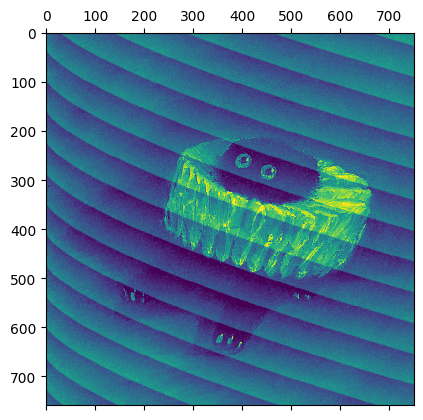

In [291]:
plt.matshow(img_gato)

In [292]:
height_g,width_g = img_gato.shape
height_g,width_g

(759, 750)

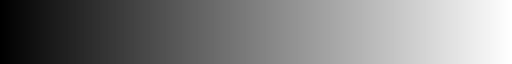

In [293]:
cmap = plt.get_cmap("grey")
cmap.set_bad((1,0,0))
cmap

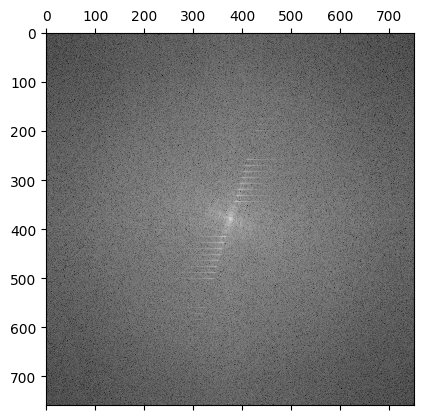

In [294]:
FFT = np.fft.fftshift(np.fft.fft2(img_gato))
# FFT[330,390] = np.nan
# FFT[331,391] = np.nan
# FFT[332,392] = np.nan
# FFT[333,393] = np.nan
# FFT[334,394] = np.nan
# FFT[335,395] = np.nan
# FFT[336,396] = np.nan
# FFT[337,390] = np.nan
# FFT[338,391] = np.nan
# FFT[320,392] = np.nan
# FFT[321,393] = np.nan
# FFT[322,394] = np.nan
# FFT[323,395] = np.nan
# FFT[324,396] = np.nan
# FFT[325,393] = np.nan
# FFT[326,394] = np.nan
# FFT[327,395] = np.nan
# FFT[328,396] = np.nan
# FFT[329,396] = np.nan
# FFT[310,392] = np.nan
# FFT[311,393] = np.nan
# FFT[312,394] = np.nan
# FFT[313,395] = np.nan
# FFT[314,396] = np.nan
# FFT[315,393] = np.nan
# FFT[316,394] = np.nan
# FFT[317,395] = np.nan
# FFT[318,396] = np.nan
# FFT[319,396] = np.nan
plt.matshow(abs(FFT),cmap=cmap,norm="log")
FFT = np.fft.ifftshift(FFT)

In [295]:
def filtrar(tamaño):

    print(tamaño)
    m = -5
    ancho_linea = 2
    r= 10

    filtro = np.ones(tamaño)
    centro_y = tamaño[0] // 2
    centro_x = tamaño[1] // 2

    for coordenada_x in range(tamaño[1]):
        for coordenada_y in range(tamaño[0]):

            #Distancia al centro de la imagen

            distancia_centro_imagen = np.sqrt(((coordenada_x - centro_x)**2)+((coordenada_y - centro_y)**2))

            #Para ver que tan alejada está la coordenada x y y del ruido proveniente de la recta

            coordenada_x_real = coordenada_x -centro_x
            coordenada_y_real = centro_y - coordenada_y

            #Distancia de un punto a una línea teniendo en cuenta a fórmula Ax + By + C = 0

            distancia_linea = abs(coordenada_y_real - (m*coordenada_x_real)) / np.sqrt(1 + m**2)

            #Ahora, para verificar que el punto se elimine siempre y cuando no sea el centro

            if distancia_centro_imagen <= r:

                filtro[coordenada_y,coordenada_x] = 1

            elif distancia_linea < ancho_linea:

                filtro[coordenada_y,coordenada_x] = 0

    return filtro



In [296]:
filtro = filtrar((height_g,width_g))
# filtro = filtro.astype(np.complex64)

(759, 750)


In [297]:
FFT_gato_filtrado = FFT * filtro

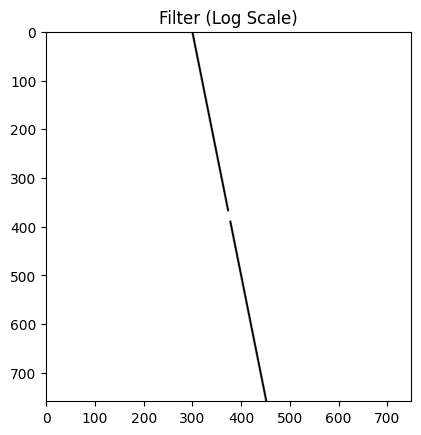

In [298]:
epsilon = 1e-8  # Small constant to avoid log(0)
plt.imshow(np.log(np.abs(filtro) + epsilon), cmap='gray')
plt.title('Filter (Log Scale)')
plt.show()


In [299]:
print(np.isnan(filtro).any())

False


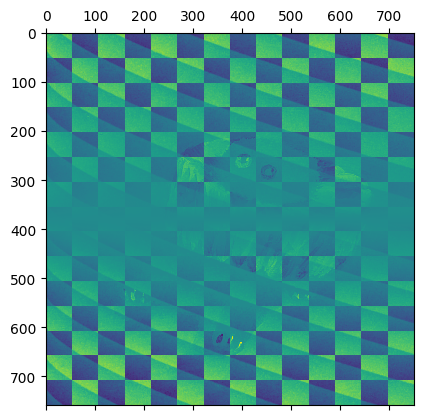

In [300]:
FFT_inversa = np.fft.ifftshift(FFT_gato_filtrado)
img_filtrada = np.fft.ifft2(FFT_inversa).real

plt.matshow(img_filtrada)


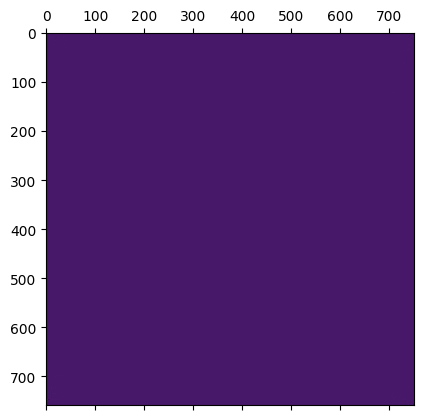

In [301]:
FFT_gato_filtrado = np.fft.fft2(FFT_gato_filtrado)
FFT_gato_filtrado = np.fft.fftshift(FFT_gato_filtrado)
# FFT[23,21] = 0
# FFT[27,29] = 0
FFT_gato_filtrado = np.fft.ifftshift(FFT_gato_filtrado)
plt.matshow( np.fft.ifft2(FFT_gato_filtrado).real )